# Encode features for the dataset
The column names have the following syntax -

If a column name ends with:
1. _menc: It means mean encoding has been used to encode
2. _fenc: It means frequency encoding has been used to encode
3. _oenc: It means OHE encoding has been used to encode
4. _benc: It means Binary encoding has been used to encode
5. _orenc: It means Ordinal encoding has been used to encode

# Import the environment

In [23]:
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load input data

In [2]:
train = pd.read_csv("../data/train.csv")
store = pd.read_csv("../data/store.csv")

/Users/apple/miniconda3/envs/cta-dev/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Merge train and store

In [3]:
merged_train_store = pd.merge(store, train, on='Store', how='left')

# Drop the rows with no Sales

In [4]:
zero_sales_mask = merged_train_store.Sales == 0
# Percentage of rows with Sales data missing
100 * np.sum(zero_sales_mask) / len(merged_train_store)

16.59765260569176

In [5]:
len(merged_train_store) - np.sum(zero_sales_mask)

515821

In [6]:
nonzero_sales = merged_train_store.loc[~zero_sales_mask]
nonzero_sales.shape

(515821, 18)

# Drop the Customers column

In [7]:
nonzero_sales = nonzero_sales.drop('Customers', axis=1)

# Convert the Date to datetime

In [8]:
nonzero_sales.Date = pd.to_datetime(nonzero_sales.Date)

# Explore the feature space to encode

In [9]:
nonzero_sales.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-02,3.0,5530.0,NaN,0.0,0,1.0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-03,4.0,4327.0,1.0,0.0,0,1.0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-04,5.0,4486.0,1.0,0.0,0,1.0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-05,6.0,4997.0,1.0,0.0,NaN,1.0
6,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-07,1.0,7176.0,1.0,1.0,0,1.0


In [10]:
nonzero_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515821 entries, 1 to 618472
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      515821 non-null  int64         
 1   StoreType                  515821 non-null  object        
 2   Assortment                 515821 non-null  object        
 3   CompetitionDistance        514460 non-null  float64       
 4   CompetitionOpenSinceMonth  351932 non-null  float64       
 5   CompetitionOpenSinceYear   351932 non-null  float64       
 6   Promo2                     515821 non-null  int64         
 7   Promo2SinceWeek            261707 non-null  float64       
 8   Promo2SinceYear            261707 non-null  float64       
 9   PromoInterval              261707 non-null  object        
 10  Date                       515821 non-null  datetime64[ns]
 11  DayOfWeek                  500470 non-null  float64 

In [11]:
nonzero_sales.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Date',
       'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### Store

In [12]:
# Number of unique stores
nonzero_sales.Store.nunique()

1115

##### Frequency encoding of Stores
Encode the store_id with the frequency of its occurence in the whole data set

In [13]:
nonzero_sales.Store.nunique()

1115

In [14]:
#store_to_salesmean = nonzero_sales.groupby('Store').transform('mean')['Sales']
#nonzero_sales['Store_menc'] = store_to_salesmean

In [15]:
store_freq = Counter(nonzero_sales.Store)
nonzero_sales['Store_fenc'] = nonzero_sales.Store.map(store_freq) 

In [58]:
store_freq

Counter({1: 468,
         2: 470,
         3: 465,
         4: 464,
         5: 471,
         6: 462,
         7: 469,
         8: 462,
         9: 463,
         10: 470,
         11: 459,
         12: 473,
         13: 434,
         14: 462,
         15: 467,
         16: 467,
         17: 469,
         18: 470,
         19: 468,
         20: 435,
         21: 473,
         22: 442,
         23: 461,
         24: 459,
         25: 434,
         26: 467,
         27: 468,
         28: 471,
         29: 469,
         30: 455,
         31: 476,
         32: 437,
         33: 463,
         34: 476,
         35: 469,
         36: 433,
         37: 467,
         38: 467,
         39: 464,
         40: 452,
         41: 440,
         42: 468,
         43: 461,
         44: 463,
         45: 464,
         46: 430,
         47: 463,
         48: 472,
         49: 462,
         50: 463,
         51: 440,
         52: 446,
         53: 465,
         54: 467,
         55: 465,
         56: 462,
 

In [16]:
nonzero_sales[['Store', 'Store_fenc']]

,Store,Store_fenc
1,1,468
2,1,468
3,1,468
4,1,468
6,1,468
...,...,...
618467,1115,470
618469,1115,470
618470,1115,470
618471,1115,470


In [17]:
nonzero_sales.Store_fenc.nunique()

85

### StoreType

In [18]:
nonzero_sales.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [19]:
nonzero_sales = pd.get_dummies(nonzero_sales, columns=['StoreType'], drop_first=True)

In [20]:
nonzero_sales.head()

,Store,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Store_fenc,StoreType_b,StoreType_c,StoreType_d
1,1,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-02,3.0,5530.0,NaN,0.0,0,1.0,468,0,1,0
2,1,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-03,4.0,4327.0,1.0,0.0,0,1.0,468,0,1,0
3,1,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-04,5.0,4486.0,1.0,0.0,0,1.0,468,0,1,0
4,1,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-05,6.0,4997.0,1.0,0.0,NaN,1.0,468,0,1,0
6,1,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-07,1.0,7176.0,1.0,1.0,0,1.0,468,0,1,0


### Assortment

In [26]:
nonzero_sales.Assortment.value_counts()

a    273147
c    237746
b      4928
Name: Assortment, dtype: int64

In [27]:
# This is an ordinal variable
# Encode with an ordinal set of numbers
enc_assort = {'a':1, 'b':2, 'c':3}
nonzero_sales['Assortment_orenc'] = nonzero_sales.Assortment.map(enc_assort)

In [28]:
nonzero_sales[['Assortment', 'Assortment_orenc']]

,Assortment,Assortment_orenc
1,a,1
2,a,1
3,a,1
4,a,1
6,a,1
...,...,...
618467,c,3
618469,c,3
618470,c,3
618471,c,3


### CompetitionDistance

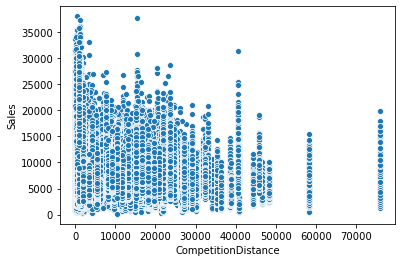

In [30]:
sns.scatterplot(x='CompetitionDistance', y='Sales', data=nonzero_sales)

### Date 

In [36]:
nonzero_sales['Month'] = nonzero_sales['Date'].dt.month
nonzero_sales['DayOfMonth'] = nonzero_sales['Date'].dt.day
nonzero_sales['Year'] = nonzero_sales['Date'].dt.year
nonzero_sales['DayOfWeek'] = nonzero_sales['Date'].dt.dayofweek
nonzero_sales['WeekOfYear'] = nonzero_sales['Date'].dt.weekofyear

### CompetitionOpenSince[Month / Year]

In [37]:
nonzero_sales['CompetitionOpenSincePeriod'] = (12 * (nonzero_sales['Year'] -
                                                     nonzero_sales['CompetitionOpenSinceYear']
                                                    )
                                              ) + (nonzero_sales['Month'] - 
                                                   nonzero_sales['CompetitionOpenSinceMonth']
                                                  )

### Promo2

In [39]:
nonzero_sales.Promo2.value_counts()

1    261707
0    254114
Name: Promo2, dtype: int64

### Promo2Since[Week / Year]

In [42]:
nonzero_sales['Promo2SincePeriod'] = (52 * (nonzero_sales['Year'] - 
                                            nonzero_sales['Promo2SinceYear']
                                           ) + (nonzero_sales['WeekOfYear'] - 
                                                nonzero_sales['Promo2SinceWeek']
                                               )
                                     )

In [43]:
nonzero_sales.columns

Index(['Store', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Date',
       'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Store_fenc', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_orenc', 'Month', 'DayOfMonth', 'Year', 'WeekOfYear',
       'CompetitionOpenSincePeriod', 'Promo2SincePeriod'],
      dtype='object')

### PromoInterval

In [44]:
nonzero_sales.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     152773
Feb,May,Aug,Nov      59939
Mar,Jun,Sept,Dec     48995
Name: PromoInterval, dtype: int64

In [45]:
nonzero_sales = pd.get_dummies(nonzero_sales, 
                               columns=['PromoInterval'], 
                               drop_first=True)

### Open

In [47]:
nonzero_sales.Open.value_counts()

1.0    497264
0.0      2993
Name: Open, dtype: int64

### Promo

In [49]:
nonzero_sales.Promo.value_counts()

0.0    284503
1.0    215814
Name: Promo, dtype: int64

### StateHoliday

In [52]:
nonzero_sales.StateHoliday.unique()

array(['0', nan, 0.0, 'a', 'c', 'b'], dtype=object)

In [53]:
state_holiday_enc = {'0':0, 0.0:0, 'a':1, 'b':1, 'c':1}
nonzero_sales['StateHoliday_benc'] = nonzero_sales.StateHoliday.map(state_holiday_enc)

In [54]:
nonzero_sales.StateHoliday_benc.value_counts()

0.0    499146
1.0      1088
Name: StateHoliday_benc, dtype: int64

### SchoolHoliday

In [56]:
nonzero_sales.SchoolHoliday.value_counts()

0.0    406929
1.0     93241
Name: SchoolHoliday, dtype: int64

In [57]:
nonzero_sales.columns

Index(['Store', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Date', 'DayOfWeek', 'Sales',
       'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Store_fenc',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_orenc',
       'Month', 'DayOfMonth', 'Year', 'WeekOfYear',
       'CompetitionOpenSincePeriod', 'Promo2SincePeriod',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StateHoliday_benc'],
      dtype='object')